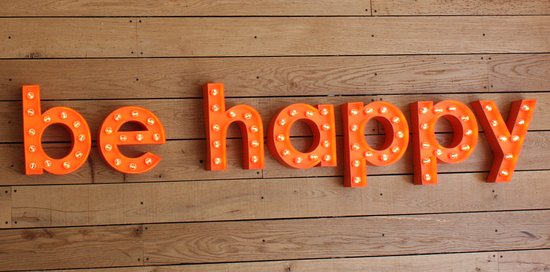

In [66]:
#insert the photo
from IPython.display import Image
image_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/figs/title_happy.jpg"
Image(filename=image_path, width=600, height=600)

## What is happiness?

Happiness, a profound and elusive emotion, is the warm embrace of the soul when life's melodies harmonize with our inner symphony. It's the radiant sunbeam that pierces through the darkest of clouds, illuminating our path with hope and joy. Happiness is not a fleeting moment but a state of being, a tapestry woven from the threads of gratitude, contentment, and love.

It resides in the simple pleasures of life, like the laughter of children, the scent of blooming flowers, or the gentle touch of a loved one's hand. It's the satisfaction derived from pursuing our passions, the exhilaration of reaching new heights, and the serenity found in quiet moments of reflection.

Happiness is a choice, an art of embracing life's imperfections with a heart full of acceptance. It's the empathy we extend to others, the acts of kindness that create ripples of joy, and the connections we forge with fellow travelers on this journey.

In the tapestry of life, happiness is the vibrant thread that weaves through our experiences, making each moment precious. It's the compass that guides us towards a life well-lived, reminding us that true happiness is not found in possessions but in the richness of our human connections and the depths of our souls.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
!pip install seaborn

In [3]:
cleaned_hm_csv_path = "/Users/chenjianfeng/Desktop/5243/project 1 happy DB/HappyDB-master/happydb/data/cleaned_hm.csv"
demographic_csv_path = "/Users/chenjianfeng/Desktop/5243/project 1 happy DB/HappyDB-master/happydb/data/demographic.csv"

## Fortunately, we've got our hands on a dataset focused on happiness and joyous moments. We're all set to embark on an exciting journey of analyzing the Happy Moment Database. Let's dive right in!

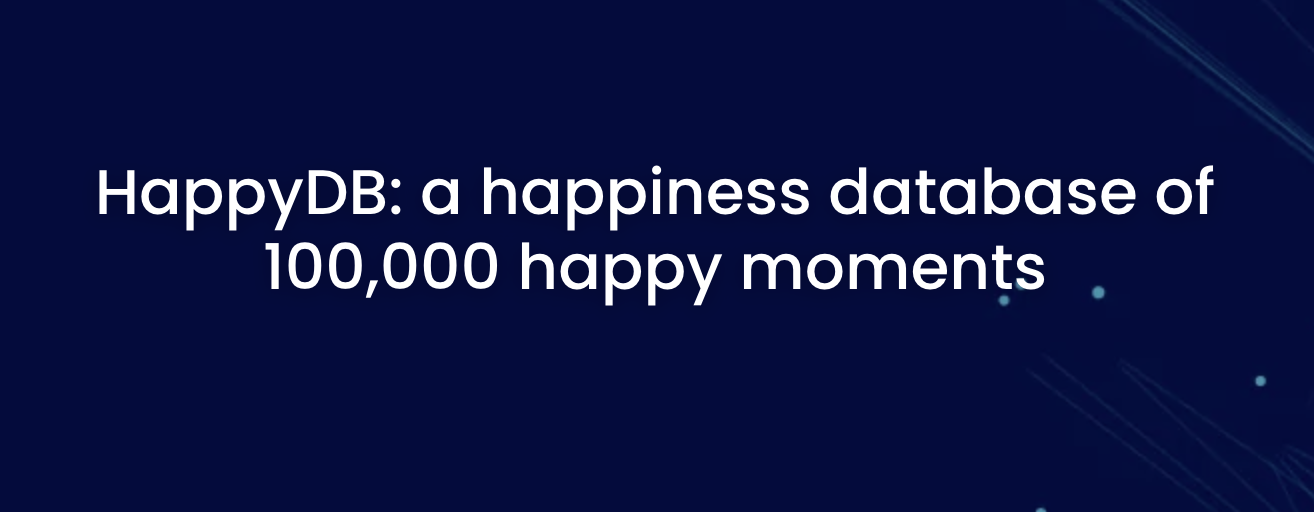

In [67]:
#insert the photo
from IPython.display import Image
image_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/figs/happy_db.jpg"
Image(filename=image_path, width=600, height=600)

## 1: What really matters in our happiness?

#### WordCloud

In [26]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 966.5 kB/s eta 0:00:00 0:00:01m
Note: you may need to restart the kernel to use updated packages.


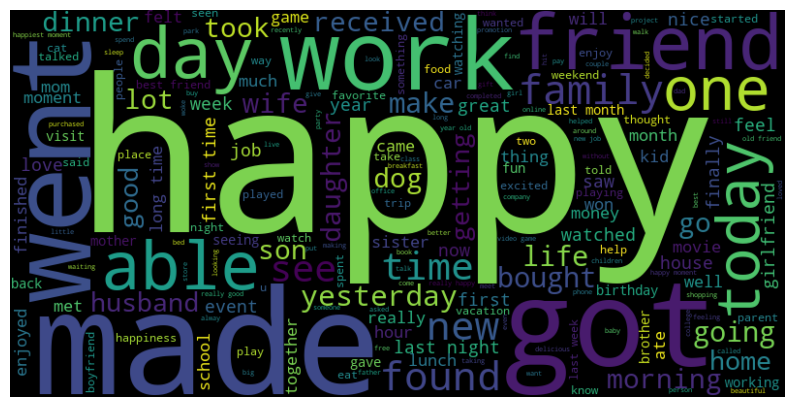

In [68]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/Users/chenjianfeng/Desktop/5243/project 1 happy DB/HappyDB-master/happydb/data/cleaned_hm.csv')

# Concatenate text data from the 'cleaned_hm' column into a long string
text = ' '.join(df['cleaned_hm'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()



In [34]:
pip install spacy 

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/ca/f3/609bb7512cad1f02af13daa23aa433b931da34c502211f29fd47dceff624/spacy-3.7.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/7a/05/4a3b5c3043c6d84c00bf0f574d326660702b1c10174fe6b44cef3c3dff08/murmurhash-1.0.10-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/d7/f6/67babf1439cdd6d46e4e805616bee84981305c80e562320c293712f54034/cymem-2.0.8-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.2 from https://files.pythonhosted.org/pa

In [38]:
!pip install spacy wordcloud matplotlib
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.6 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [41]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Read the data
df = pd.read_csv('/Users/chenjianfeng/Desktop/5243/project 1 happy DB/HappyDB-master/happydb/data/cleaned_hm.csv')

# Concatenate all the text data
text = ' '.join(df['cleaned_hm'].dropna())

# Define a function to process large text
def process_large_text(text, chunk_size=1000000):
    """
    Split a large text into smaller chunks and process each chunk using spaCy.
    """
    nlp.max_length = chunk_size
    doc_chunks = []
    for i in range(0, len(text), chunk_size):
        doc_chunk = nlp(text[i:i+chunk_size])
        doc_chunks.append(doc_chunk)
    return doc_chunks

# Call the function to process the text
doc_chunks = process_large_text(text)

# Now I can perform further processing on each document chunk, such as extracting information, generating word clouds, etc.

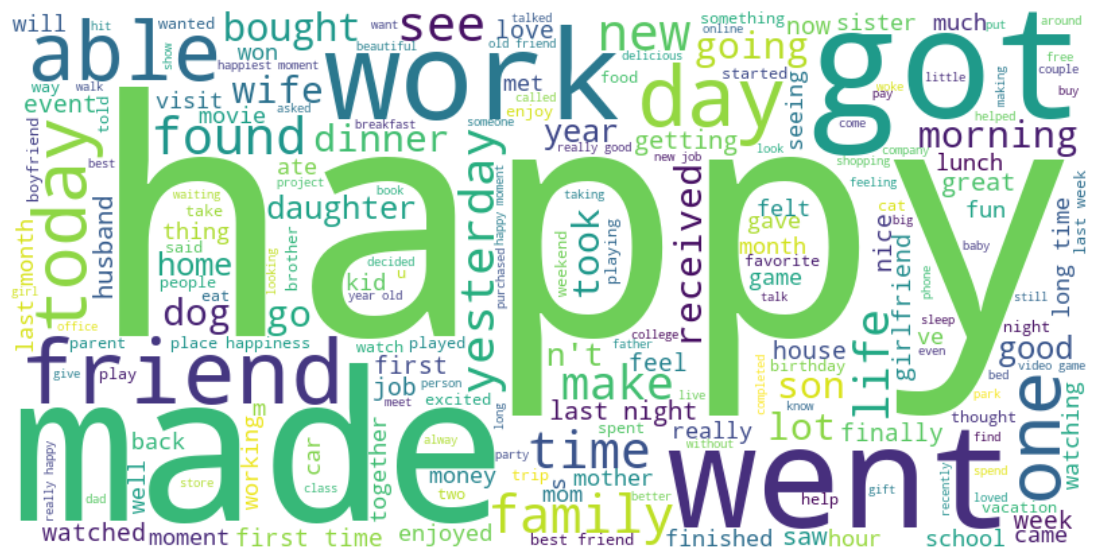

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Merge all the words from the document chunks
all_words = []
for doc_chunk in doc_chunks:
    all_words.extend([token.text for token in doc_chunk])

# Concatenate the processed words into a long string
cleaned_text = ' '.join(all_words)

# Generate a word cloud using WordCloud, you can specify additional parameters like stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(cleaned_text)

# Display the generated word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

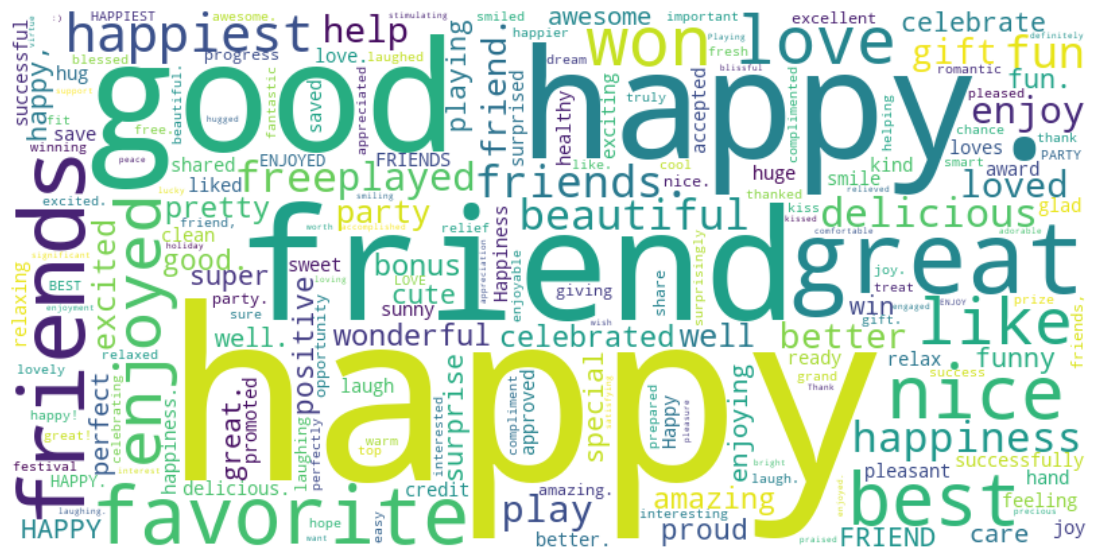

In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Read the data
df = pd.read_csv('/Users/chenjianfeng/Desktop/5243/project 1 happy DB/HappyDB-master/happydb/data/cleaned_hm.csv')

# Concatenate all the text data
text = ' '.join(df['cleaned_hm'].dropna())

# Perform sentiment analysis on the text and accumulate sentiment scores
word_sentiments = {}  # Dictionary for word sentiments
for word in text.split():
    sentiment = sia.polarity_scores(word)['compound']
    word_sentiments[word] = word_sentiments.get(word, 0) + sentiment

# Generate a word cloud based on accumulated sentiment scores for words
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(word_sentiments)

# Display the generated word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [50]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 2.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenjianfeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


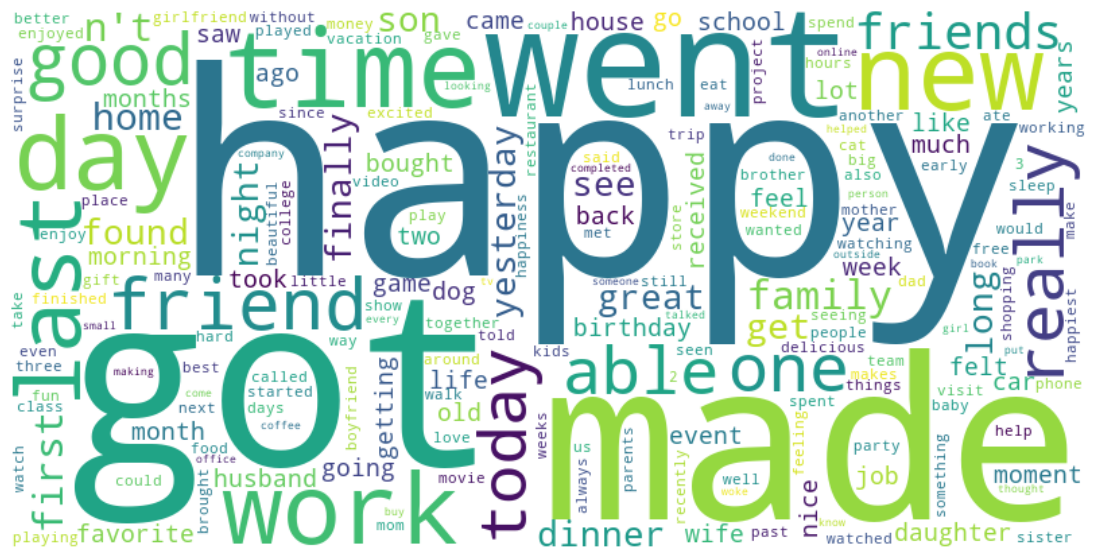

In [52]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')

# Read the data
df = pd.read_csv('/Users/chenjianfeng/Desktop/5243/project 1 happy DB/HappyDB-master/happydb/data/cleaned_hm.csv')

# Concatenate all the text data
text = ' '.join(df['cleaned_hm'].dropna())

# Perform sentiment analysis using TextBlob
blob = TextBlob(text)

# Get the sentiment score of the text
sentiment_score = blob.sentiment.polarity

# Tokenize the text
words = blob.words

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Create a dictionary of word sentiments
word_sentiments = {}
for word in filtered_words:
    word_sentiments[word] = blob.word_counts[word] * sentiment_score

# Generate a word cloud based on accumulated sentiment scores for words
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(word_sentiments)

# Display the generated word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 2. Does getting married guarantee happiness for us? What about the single nobility?

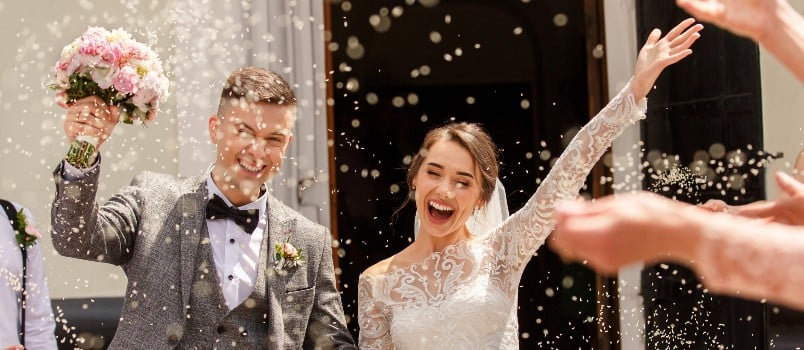

In [69]:
#insert the photo
from IPython.display import Image
image_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/figs/marital_happy.jpg"
Image(filename=image_path, width=600, height=600)

#### Analyze which group has a stronger sense of happiness, married or single individuals.

read clean_hm.csv and degographic.csv file

In [4]:
clean_hm_df = pd.read_csv(cleaned_hm_csv_path)
clean_hm_df.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection


In [5]:
demographic_df = pd.read_csv(demographic_csv_path)
demographic_df.head()

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y


In [6]:
clean_hm_df.dropna(subset=['ground_truth_category'],inplace=True)

In [7]:
merge_df = demographic_df.merge(clean_hm_df,on='wid')

In [8]:
merge_df.head()

,wid,age,country,gender,marital,parenthood,hmid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,1,37.0,USA,m,married,y,28054,24h,My mother called out of the blue to tell me ho...,My mother called out of the blue to tell me ho...,True,1,affection,affection
1,1,37.0,USA,m,married,y,57637,24h,I got to take the day off from my part time jo...,I got to take the day off from my part time jo...,True,1,affection,affection
2,1,37.0,USA,m,married,y,64498,3m,my son had a great time on his 8th birthday.,my son had a great time on his 8th birthday.,True,1,affection,affection
3,1,37.0,USA,m,married,y,80306,3m,I got to have a three day weekend which i spen...,I got to have a three day weekend which i spen...,True,1,affection,affection
4,1,37.0,USA,m,married,y,88307,3m,My fiance proposed to me in front of my family...,My fiance proposed to me in front of my family...,True,1,affection,affection


In [9]:
merge_df = merge_df[merge_df['country'] == 'USA']

In [10]:
merge_df['age'] = pd.to_numeric(merge_df['age'], errors='coerce')
merge_df['age'] = merge_df['age'].fillna(0).astype(int)
adult_df = merge_df[merge_df['age']>16]

In [11]:
adult_df.head()

,wid,age,country,gender,marital,parenthood,hmid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,1,37,USA,m,married,y,28054,24h,My mother called out of the blue to tell me ho...,My mother called out of the blue to tell me ho...,True,1,affection,affection
1,1,37,USA,m,married,y,57637,24h,I got to take the day off from my part time jo...,I got to take the day off from my part time jo...,True,1,affection,affection
2,1,37,USA,m,married,y,64498,3m,my son had a great time on his 8th birthday.,my son had a great time on his 8th birthday.,True,1,affection,affection
3,1,37,USA,m,married,y,80306,3m,I got to have a three day weekend which i spen...,I got to have a three day weekend which i spen...,True,1,affection,affection
4,1,37,USA,m,married,y,88307,3m,My fiance proposed to me in front of my family...,My fiance proposed to me in front of my family...,True,1,affection,affection


In [12]:
adult_wid_unique_df = adult_df.drop_duplicates(subset=['wid'])

### Surveys in the United States indicate that single individuals report a stronger sense of happiness.

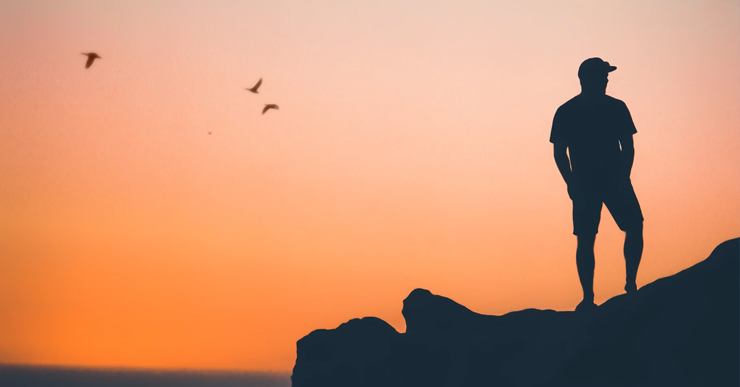

In [70]:
#insert the photo
from IPython.display import Image
image_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/figs/single_happy.jpg"
Image(filename=image_path, width=600, height=600)

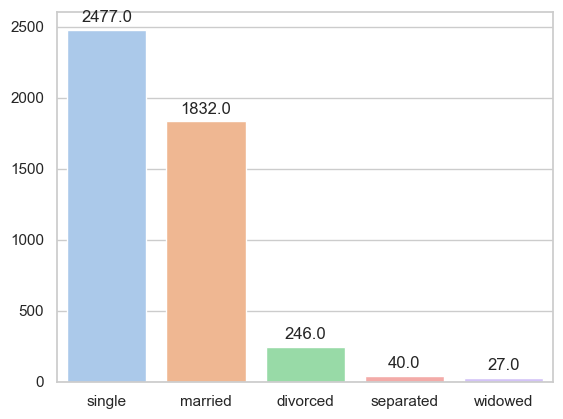

In [13]:
marital_series = adult_wid_unique_df['marital'].value_counts()
sns.set_theme(style="whitegrid", palette="pastel")
barplot  = sns.barplot(x=marital_series.index,y=marital_series.values)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

In [14]:
bins = [16, 20, 25, 30,35,40,45,50,55,60]
labels = ['16-20', '21-25', '26-30','31-35', '36-40', '41-45','46-50', '51-55', '56-60']
adult_wid_unique_df['range'] = pd.cut(adult_wid_unique_df['age'], bins=bins, labels=labels)

/var/folders/x1/cmq6ht1x7ygffd5zpgqj2kv80000gn/T/ipykernel_68554/3292791220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_wid_unique_df['range'] = pd.cut(adult_wid_unique_df['age'], bins=bins, labels=labels)


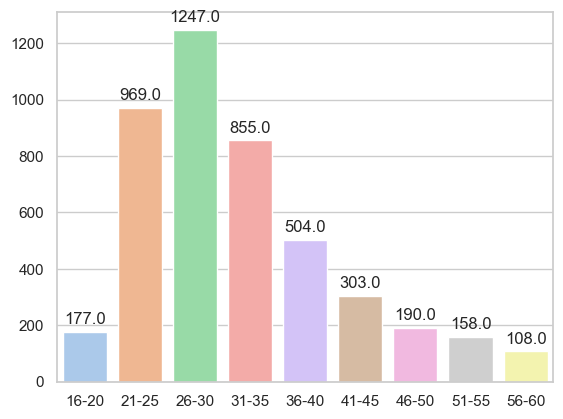

In [15]:
range_count_series = adult_wid_unique_df['range'].value_counts()
barplot  = sns.barplot(x=range_count_series.index,y=range_count_series.values)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

In [16]:
married_range_count = adult_wid_unique_df[adult_wid_unique_df['marital']=='married']['range'].value_counts()

married_range_count_dict = married_range_count.to_dict()

married_range_count_dict

{'31-35': 456,
 '26-30': 435,
 '36-40': 309,
 '41-45': 172,
 '21-25': 132,
 '51-55': 96,
 '46-50': 93,
 '56-60': 62,
 '16-20': 5}

In [17]:
married_range_count_updated_dict = {}
def update_list_to_cumulative_sum(lst):
    for i in range(1, len(lst)):
        lst[i] += lst[i - 1]
    return lst

updated_list = update_list_to_cumulative_sum(list(married_range_count_dict.values()))

for idx,key in  enumerate(married_range_count_dict.keys()):
    married_range_count_updated_dict[key] = updated_list[idx]

married_range_count_series = pd.Series(married_range_count_updated_dict)
married_range_count_updated_dict

{'31-35': 456,
 '26-30': 891,
 '36-40': 1200,
 '41-45': 1372,
 '21-25': 1504,
 '51-55': 1600,
 '46-50': 1693,
 '56-60': 1755,
 '16-20': 1760}

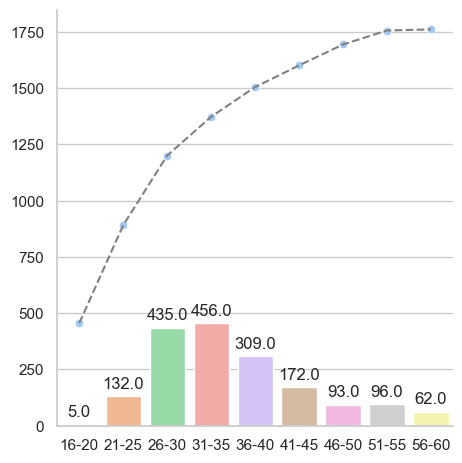

In [18]:
g = sns.relplot(x=married_range_count_series.index,y=married_range_count_series.values,kind='scatter')
ax = g.axes[0,0]
ax.plot(married_range_count_series.index, married_range_count_series.values, color='gray', linestyle='--')
barplot  = sns.barplot(x=married_range_count.index,y=married_range_count.values,ax=ax)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

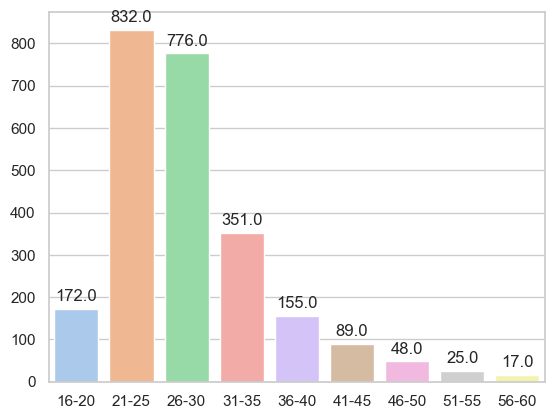

In [19]:
sinle_range_count = adult_wid_unique_df[adult_wid_unique_df['marital']=='single']['range'].value_counts()
barplot  = sns.barplot(x=sinle_range_count.index,y=sinle_range_count.values)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

In [20]:
adult_df.head()

,wid,age,country,gender,marital,parenthood,hmid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,1,37,USA,m,married,y,28054,24h,My mother called out of the blue to tell me ho...,My mother called out of the blue to tell me ho...,True,1,affection,affection
1,1,37,USA,m,married,y,57637,24h,I got to take the day off from my part time jo...,I got to take the day off from my part time jo...,True,1,affection,affection
2,1,37,USA,m,married,y,64498,3m,my son had a great time on his 8th birthday.,my son had a great time on his 8th birthday.,True,1,affection,affection
3,1,37,USA,m,married,y,80306,3m,I got to have a three day weekend which i spen...,I got to have a three day weekend which i spen...,True,1,affection,affection
4,1,37,USA,m,married,y,88307,3m,My fiance proposed to me in front of my family...,My fiance proposed to me in front of my family...,True,1,affection,affection


### The sense of happiness among single individuals is often reflected in the joy of achieving continuous progress in work and studies and gaining recognition from others, which embodies their sense of life's value.

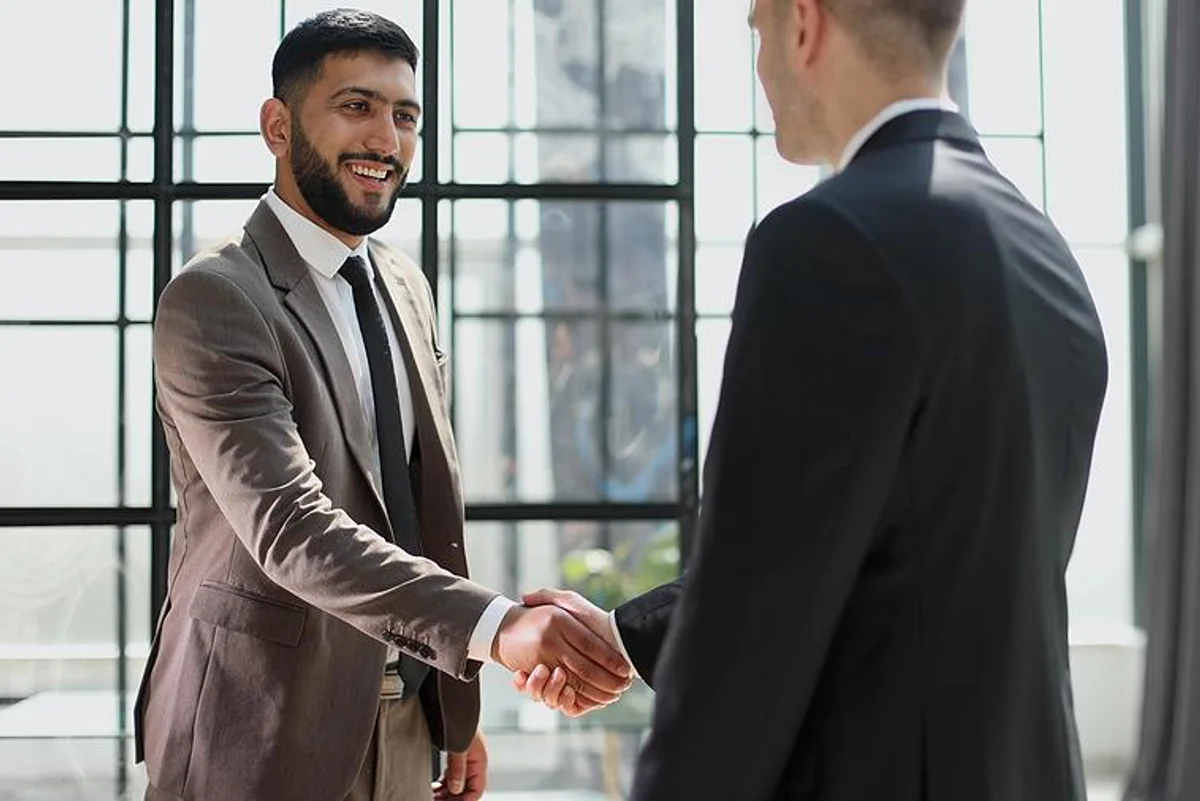

In [71]:
#insert the photo
from IPython.display import Image
image_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/figs/career_happy.jpg"
Image(filename=image_path, width=600, height=600)

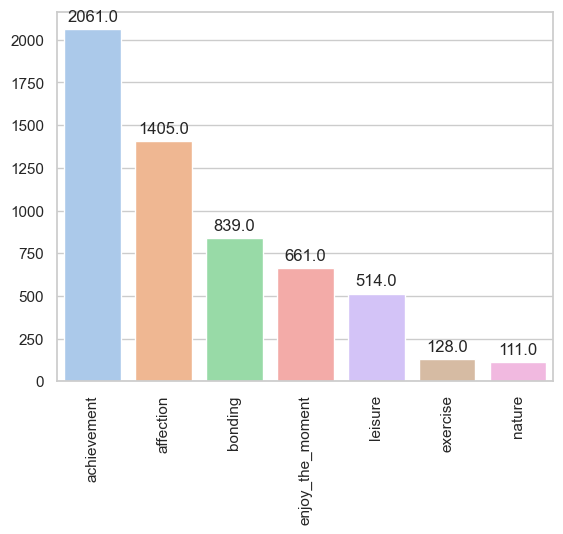

In [21]:
single_series = adult_df[adult_df['marital']=='single']['predicted_category'].value_counts()
barplot  = sns.barplot(x=single_series.index,y=single_series.values)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

### It is the fondness for the caring atmosphere of family that leads them to happily walk down the aisle into matrimony.

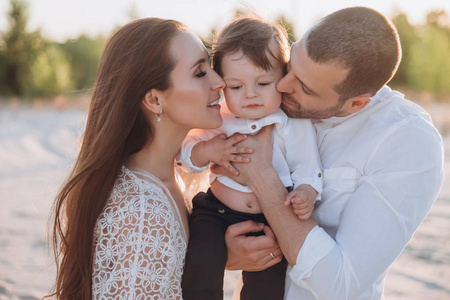

In [72]:
#insert the photo
from IPython.display import Image
image_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/figs/parenthood_happy.jpg"
Image(filename=image_path, width=600, height=600)

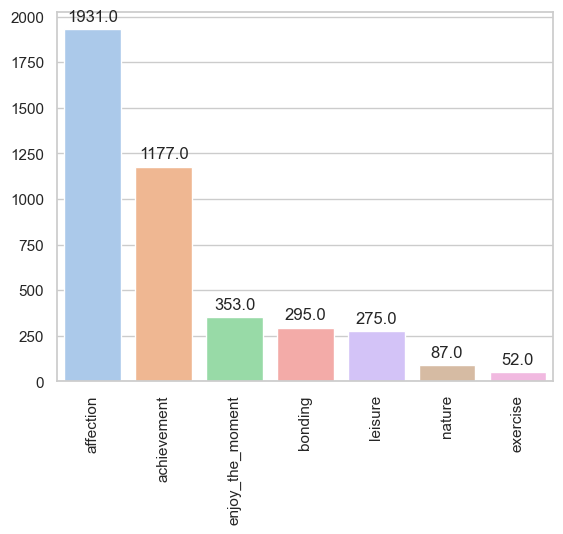

In [22]:
married_series = adult_df[adult_df['marital']=='married']['predicted_category'].value_counts()
barplot  = sns.barplot(x=married_series.index,y=married_series.values)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

## In marriage, the source of happiness often stems from the affection shared between partners.

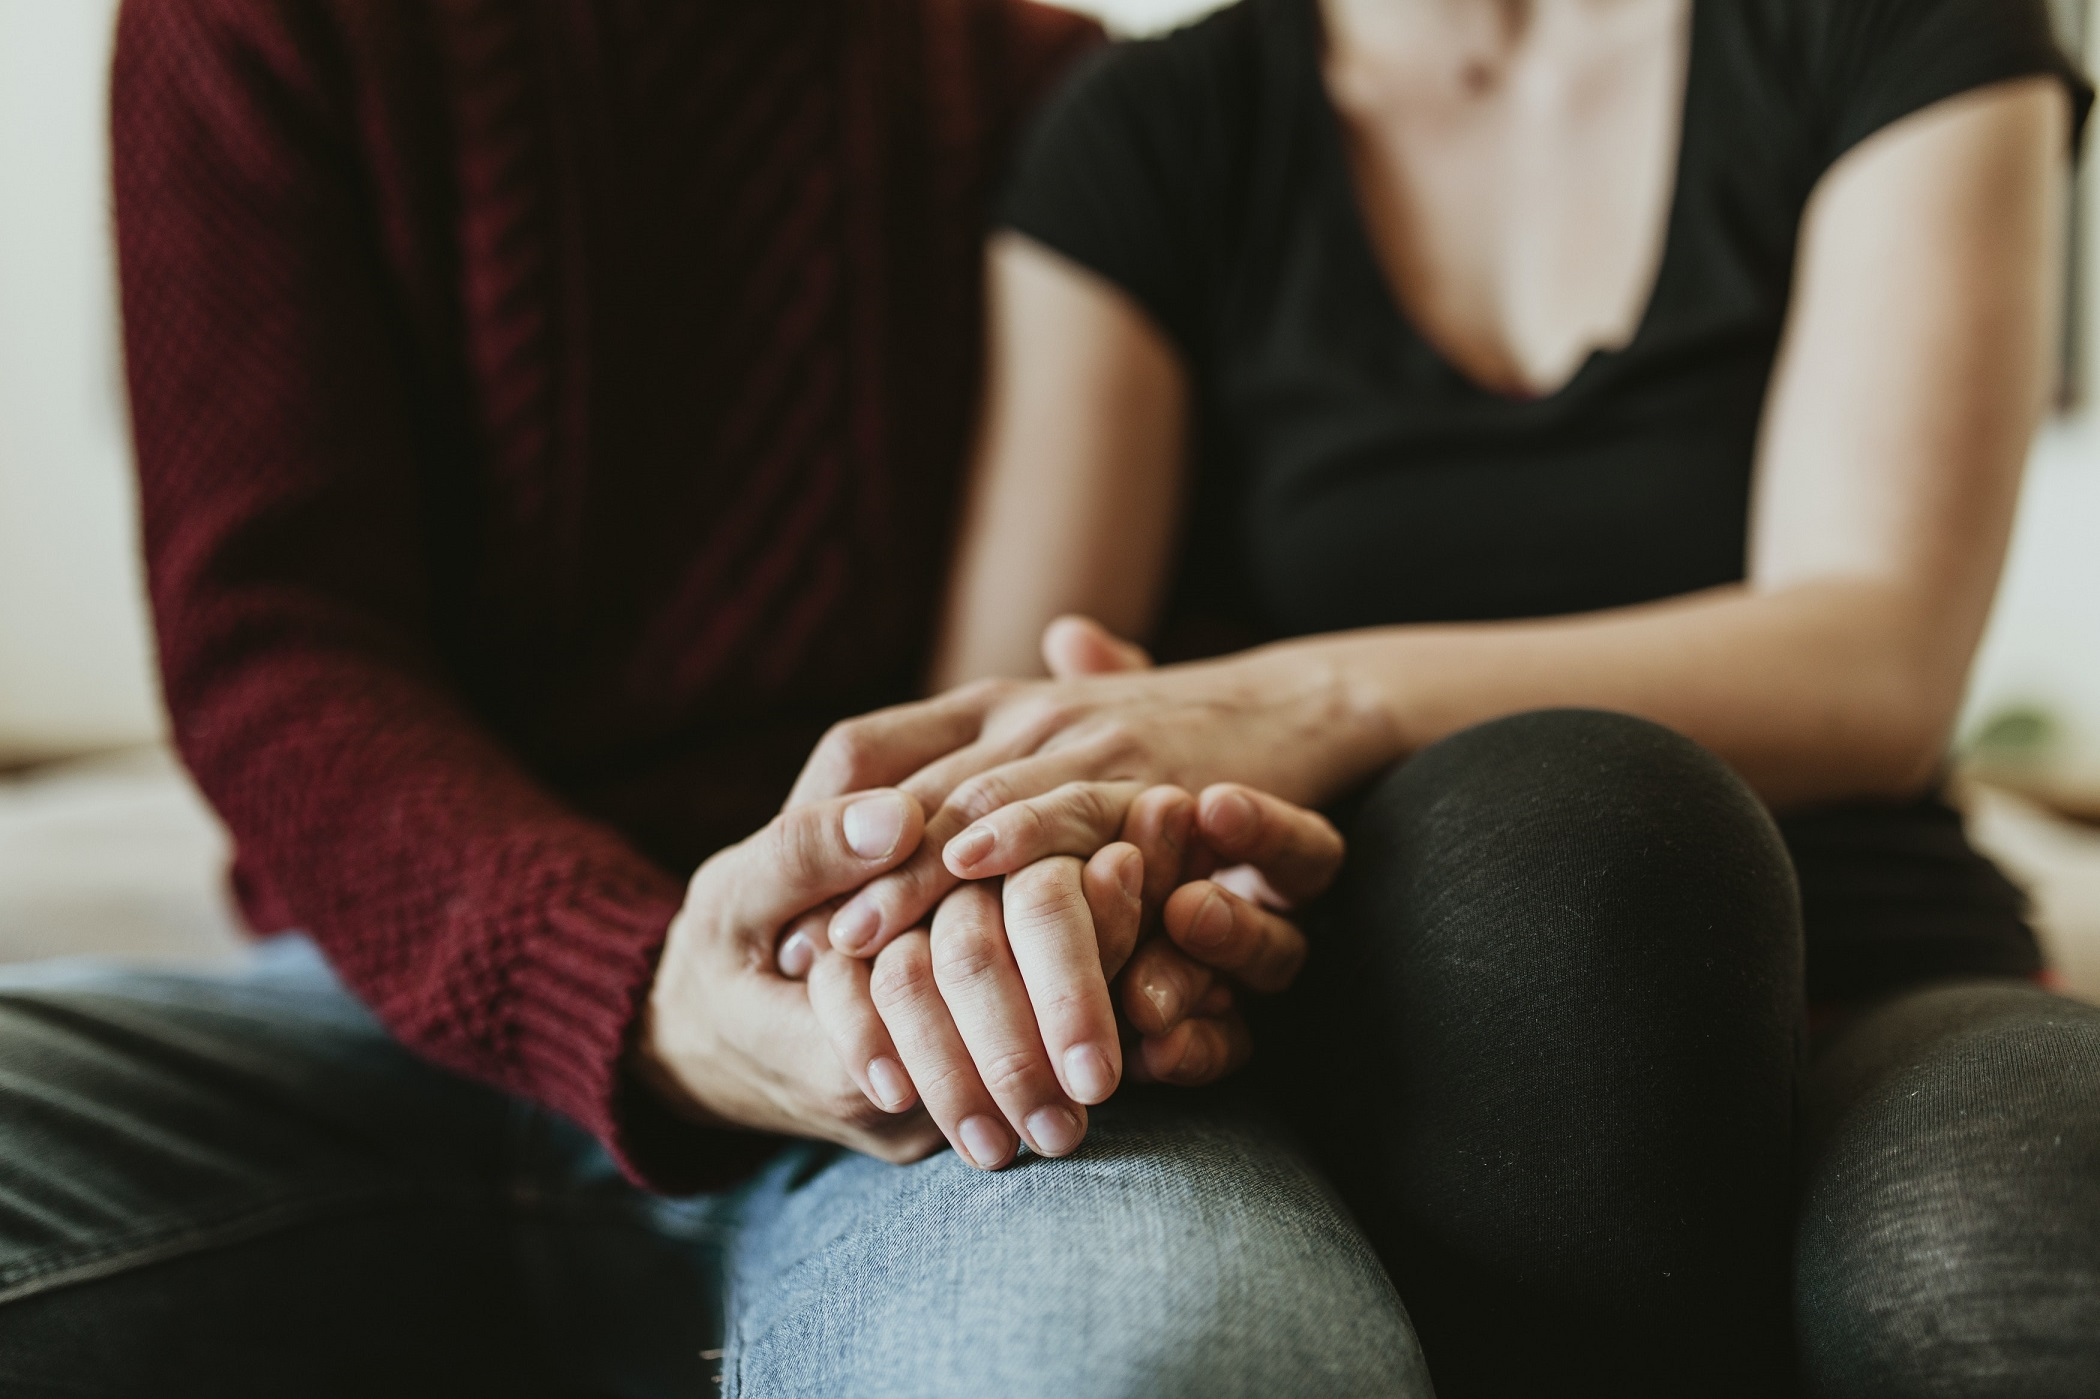

In [73]:
#insert the photo
from IPython.display import Image
image_path = "/Users/chenjianfeng/Github/new_Colin/ads-spring2024-project1-Colin-chan1366/figs/partner_happy.jpg"
Image(filename=image_path, width=600, height=600)

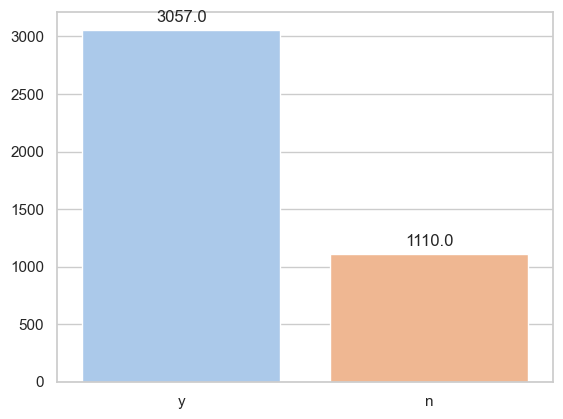

In [23]:
married_parenthood_series = adult_df[adult_df['marital']=='married']['parenthood'].value_counts()
barplot  = sns.barplot(x=married_parenthood_series.index,y=married_parenthood_series.values)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

### Explore: Result comparison in terms of happy moment statistcis and sentiment analysis model

In [54]:
df = pd.read_csv("sementic_cleaned_hm.csv")
df.head()

In [ ]:
demographic_csv_path = "/Users/chenjianfeng/Desktop/5243/project 1 happy DB/HappyDB-master/happydb/data/demographic.csv"
demographic_df = pd.read_csv(demographic_csv_path)
demographic_df.head()

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y


C:\Users\yhyxx\AppData\Local\Temp\ipykernel_6836\268421861.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


[Text(0, 0, 'affection'),
 Text(1, 0, 'exercise'),
 Text(2, 0, 'bonding'),
 Text(3, 0, 'leisure'),
 Text(4, 0, 'achievement'),
 Text(5, 0, 'enjoy_the_moment'),
 Text(6, 0, 'nature')]

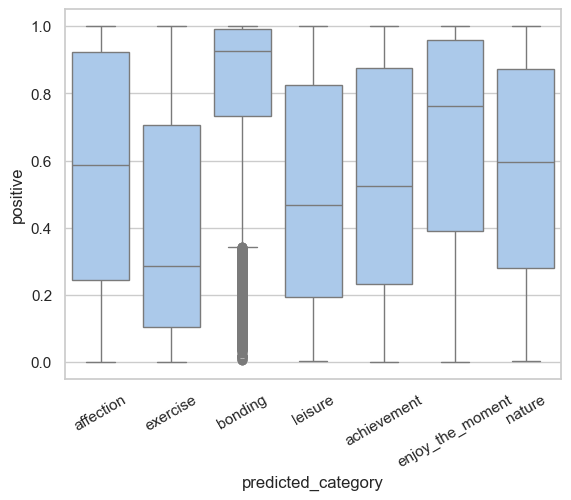

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.boxplot(x='predicted_category', y='positive', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [ ]:
df_ground_truth = df.dropna(subset=['ground_truth_category'])

C:\Users\yhyxx\AppData\Local\Temp\ipykernel_6836\2889382971.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


[Text(0, 0, 'bonding'),
 Text(1, 0, 'leisure'),
 Text(2, 0, 'affection'),
 Text(3, 0, 'enjoy_the_moment'),
 Text(4, 0, 'achievement'),
 Text(5, 0, 'nature'),
 Text(6, 0, 'exercise')]

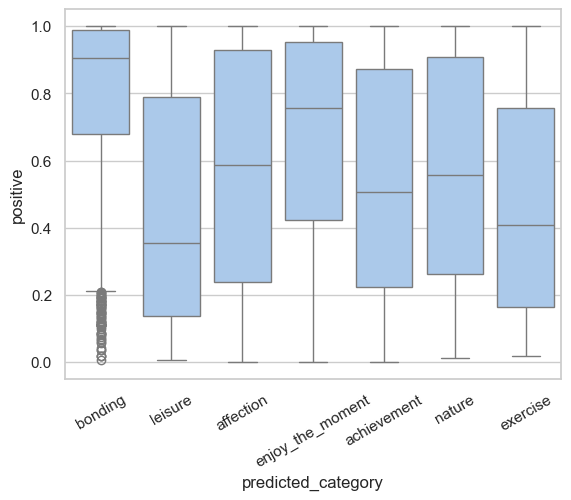

In [ ]:
ax = sns.boxplot(x='predicted_category', y='positive', data=df_ground_truth)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

C:\Users\yhyxx\AppData\Local\Temp\ipykernel_6836\1198910182.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


[Text(0, 0, 'bonding'),
 Text(1, 0, 'leisure'),
 Text(2, 0, 'affection'),
 Text(3, 0, 'enjoy_the_moment'),
 Text(4, 0, 'achievement'),
 Text(5, 0, 'nature'),
 Text(6, 0, 'exercise')]

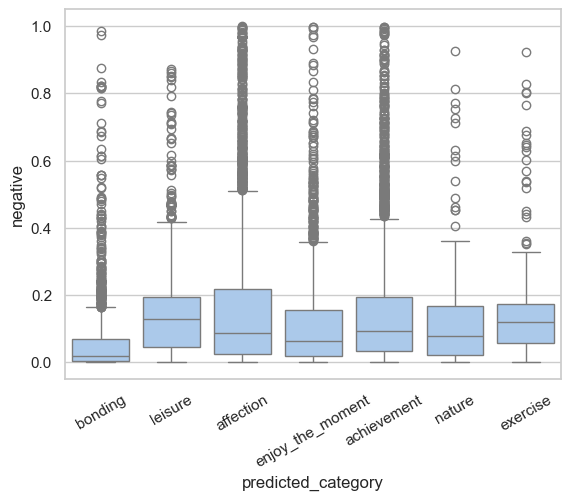

In [ ]:
ax = sns.boxplot(x='predicted_category', y='negative', data=df_ground_truth)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [ ]:
merge_df = df_ground_truth.merge(demographic_df,on='wid')
merge_df.head()

,Unnamed: 0,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,positive,negative,neutral,age,country,gender,marital,parenthood
0,3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding,0.954003,0.044106,0.001891,28,DNK,f,married,n
1,21745,49534,206,24h,I bought my wedding shoes!,I bought my wedding shoes!,True,1,achievement,achievement,0.221079,0.271567,0.507355,28,DNK,f,married,n
2,24645,52451,206,24h,My new watch arrived in the mail!,My new watch arrived in the mail!,True,1,achievement,achievement,0.146610,0.213970,0.639420,28,DNK,f,married,n
3,56163,84125,206,3m,We watched Rocky Horror Picture Show for the f...,We watched Rocky Horror Picture Show for the f...,True,1,leisure,leisure,0.717492,0.189807,0.092702,28,DNK,f,married,n
4,57156,85125,206,3m,We played Mario Kart while drunk.,We played Mario Kart while drunk.,True,1,leisure,leisure,0.649013,0.241162,0.109825,28,DNK,f,married,n


In [ ]:
merge_df['age'] = pd.to_numeric(merge_df['age'], errors='coerce')

bins = [16, 20, 25, 30,35,40,45,50,55,60]
labels = ['16-20', '21-25', '26-30','31-35', '36-40', '41-45','46-50', '51-55', '56-60']
merge_df['range'] = pd.cut(merge_df['age'], bins=bins, labels=labels)

In [ ]:
df_age_category_df = merge_df[['ground_truth_category','range','positive']]
df_age_category_df.head()

,ground_truth_category,range,positive
0,bonding,26-30,0.954003
1,achievement,26-30,0.221079
2,achievement,26-30,0.146610
3,leisure,26-30,0.717492
4,leisure,26-30,0.649013


<Axes: xlabel='range', ylabel='ground_truth_category'>

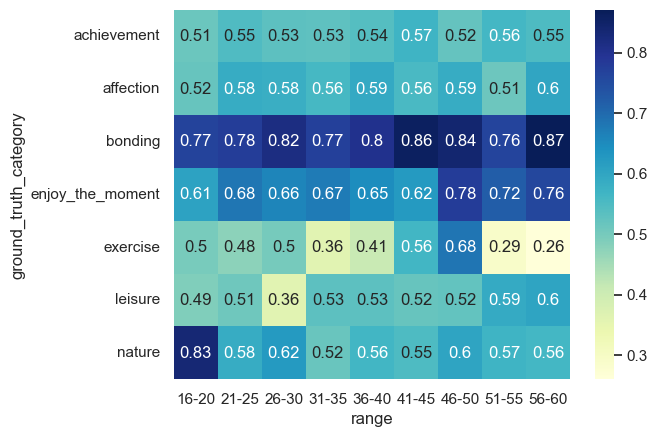

In [ ]:
grouped_category_age = df_age_category_df.groupby(['range', 'ground_truth_category']).mean()
pivot_table_category_age = grouped_category_age.pivot_table(index='ground_truth_category', columns='range', values='positive')
sns.heatmap(pivot_table_category_age, annot=True, cmap="YlGnBu")

## 3. How to improve happniess among the marital and singel?